# Sampling of Functions and Code for ML and NN Optimization

### These start as simple and increase in complexity as you scroll down

There are 10 items with different weights and values, the goal is to select a few items from these 10 items such that the total weight does not exceed 40 lb, while maximizing the total value. This is a knapsack problem solved as an optimization problem dynamically and recursively.

In [2]:
# This is a 0-1 Knapsack Problem
import numpy as np

# Solve this problem by using Dynamic Programming
def KnapSackDynProg(weights, values, n, capacity):
    opt_vals = [[0 for i in range(capacity+1)] for i in range(n+1)]
    for i in range(n+1):
        for j in range(capacity+1):
            if i == 0 or j == 0:
                opt_vals[i][j] = 0
            elif weights[i-1] > j:
                opt_vals[i][j] = opt_vals[i-1][j]
            else:
                opt_vals[i][j] = max(opt_vals[i-1][j], opt_vals[i-1][j - weights[i-1]] + values[i-1])
    return opt_vals[n][capacity]

weights = np.array([10, 5, 8, 7, 9, 12, 4, 3, 6, 9])
values = np.array([9, 8, 12, 6, 5, 11, 7, 2, 4, 8])
n = len(weights)
capacity = 40
print(KnapSackDynProg(weights, values, n, capacity))

# Solve this problem by using Recursive method
def KnapSackRecur(weights, values, n, capacity):
    if n == 0 or capacity == 0:
        return 0
    if weights[n-1] > capacity:
        return KnapSackRecur(weights, values, n-1, capacity)
    else:
        return max(KnapSackRecur(weights, values, n-1, capacity), 
                   KnapSackRecur(weights, values, n-1, capacity-weights[n-1]) + values[n-1])
print(KnapSackRecur(weights, values, n, capacity))

47
47


A simple iterative solver for a system of linear equations using a starting point and the iterative equation x(t+1)=(D^(−1))(D−A)x(t)+(D^(−1))b, t≥0.

Number of iterations: 66


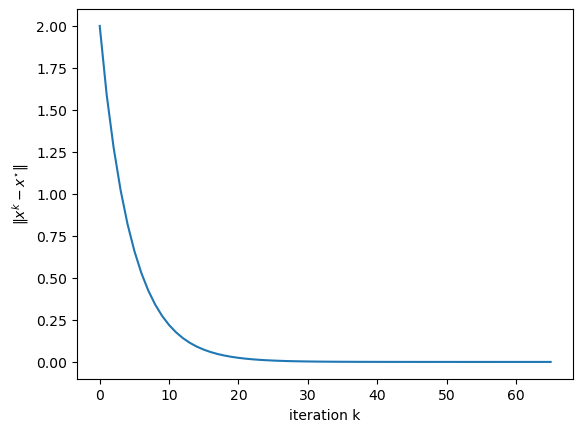

optimizer: [1. 1. 1. 1.]


In [4]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
A = np.array([[8,4,1,2],[4,10,1,3],[1,1,4,1],[2,3,1,8]])
b = np.array([15,18,7,14])
D = np.array([[8,0,0,0],[0,10,0,0],[0,0,4,0],[0,0,0,8]])
d = np.array([8,10,4,8])
dinv = 1/d
maxiter = int(1e6)
x_cur = np.array([0,0,0,0])
x_star = LA.solve(A, b) # use the numpy solver
err = []

for i in range(maxiter):
    err.append(LA.norm(x_cur - x_star))
    x_next = dinv * np.matmul(D - A, x_cur) + dinv * b
    if LA.norm(x_next - x_star) <= 1e-6:
        break
    x_cur = x_next
print("Number of iterations:", i+1)


# Plot the figure
plt.plot(range(i+1), err)
plt.xlabel('iteration k')
plt.ylabel(r'$\Vert x^k - x^{\star}\Vert$')
plt.show()
print("optimizer:", x_star)

Using the power method to approximate the spectral norm of a matrix A

In [5]:
import numpy as np
import numpy.linalg as LA

# use the built-in function in numpy to calculate ||A||
A = np.array([[1,2],[2,-1]])
norm_A = LA.norm(A, ord=2)
print("Compute ||A|| directly by linalg module: ", norm_A)

# use the power methods to calculate ||A||

def PowerIteration(A, num_iters, b0):

    b_cur = b0

    for _ in range(num_iters):
        temp = A.dot(b_cur)
        norm_temp = LA.norm(temp)
        b_cur = temp / norm_temp

    return LA.norm(A.dot(b_cur))

b0 = np.array([1,1])
norm_A = PowerIteration(np.array([[1, 2], [2, -1]]), 20, b0)
print("Compute ||A|| by Power method: ", norm_A)

Compute ||A|| directly by linalg module:  2.23606797749979
Compute ||A|| by Power method:  2.23606797749979


A Python function to implement the Gram–Schmidt process for any input matrix A, using a randomly chosen example matrix A. (The Gram–Schmidt process is a method to ortho-normalize a system of arbitrary vectors to obtain an orthonormal system)

In [6]:
import numpy as np
import numpy.linalg as LA

A = np.array([[1.5,3,0,1],[2,1.5,0,2],[1,5.5,1,1],[0,2,2,3]])

def GramSchmidt(A):
    n = A.shape[1]
    Q = A.copy()
    u_list = []

    for j in range(n):
        u = A[:,j] - sum([x.dot(A[:,j])*x for x in u_list])
        u = u/LA.norm(u)
        u_list.append(u)
        Q[:,j] = u
    
    return Q

Q = GramSchmidt(A)
print(Q)
Q.transpose().dot(Q) # verify whether Q'*Q is the identity matrix

[[ 0.55708601  0.06588237 -0.21287246  0.8       ]
 [ 0.74278135 -0.44287595  0.30354036 -0.4       ]
 [ 0.37139068  0.78692835 -0.28777203 -0.4       ]
 [ 0.          0.42457529  0.88302651  0.2       ]]


array([[ 1.00000000e+00,  1.20340844e-16, -1.77543152e-16,
         4.74978694e-15],
       [ 1.20340844e-16,  1.00000000e+00, -2.11734462e-16,
         8.20372417e-16],
       [-1.77543152e-16, -2.11734462e-16,  1.00000000e+00,
         2.40203885e-15],
       [ 4.74978694e-15,  8.20372417e-16,  2.40203885e-15,
         1.00000000e+00]])

Analytically calculating the gradient and Hessian of the the following function: f(x):= sum(i=1->i=d) of pi * log((e^xi)/(sum(i=1->i=d) of e^xi)).Then using an example for p = (0.2, 0.3, 0.1, 0.4)^⊤ and x = (1, 2, −1, 4)^⊤ to test your function.

In [7]:
import numpy as np

def GradF(x, p):
    w = np.exp(x)
    sum_w = sum(w)
    w = w / sum_w
    return p - w

def HessianF(x, p):
    d = len(x)
    w = np.exp(x)
    sum_w = sum(w)
    w = w / sum_w
    return w.reshape((d,1)).dot(w.reshape(1,d)) - np.diag(w)

p = np.array([0.2,0.3,0.1,0.4])
x = np.array([1,2,-1,4])
print(GradF(x, p))
print(HessianF(x, p))

[ 0.15822743  0.18645038  0.0943467  -0.43902451]
[[-0.04002762  0.00474326  0.00023615  0.03504821]
 [ 0.00474326 -0.1006561   0.00064193  0.09527091]
 [ 0.00023615  0.00064193 -0.00562134  0.00474326]
 [ 0.03504821  0.09527091  0.00474326 -0.13506238]]


A dataset is drawn from a quadratic model: C(x) = 1500+20x+0.05x^(2)+ε, where x represents the amount of products, C(x) represents the cost of producing x products, and ε is a Gaussian noise of zero mean and variance σ = 0.1. This dataset is used to form a linear regression model and estimating its coefficient vector β. Solved the linear regression models by three different methods:
• using directly normal equation
• using a Cholesky decomposition 
• using sklearn package.

Then a new prediction for 4 different values of x ∈ {105, 120, 200, 250}, results plotted.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Computer directly: [1.49989514e+03 2.00001800e+01 4.99999437e-02]
Using pseudo-inverse: [1.49989514e+03 2.00001800e+01 4.99999437e-02]
Using Cholesky: [1.49989514e+03 2.00001800e+01 4.99999437e-02]
Using sklearn: 1499.8951428349465 [ 0.         20.00018004  0.04999994]


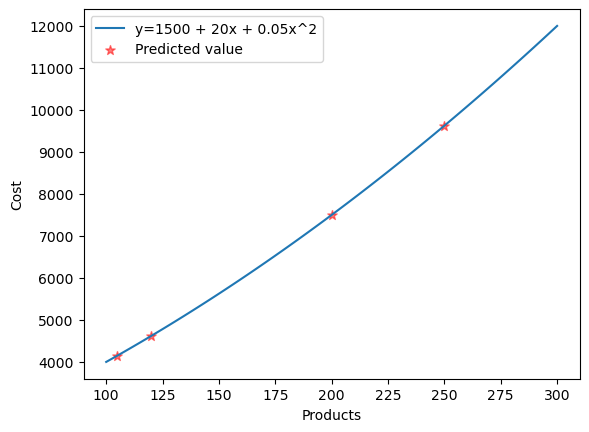

In [9]:
import numpy as np
import numpy.linalg as LA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y = np.array([31499.99, 35624.92, 40000.1, 44624.98, 49499.92, 54625.13, 59999.97, 65624.94, 71500.07])
x = np.array([600, 650, 700, 750, 800, 850, 900, 950, 1000])
X = np.stack((np.ones_like(x), x, x**2), axis=1)

Xt = X.T
XtX = Xt.dot(X)
Xty = Xt.dot(y)

# Compute directly
#beta_star = LA.inv(XtX).dot(Xty)
beta_star = LA.inv(X.T.dot(X)).dot(X.T.dot(y))
print("Computer directly:", beta_star)

# normal equation
beta_star = LA.solve(XtX, Xty)
print("Using pseudo-inverse:", beta_star)

# cholesky decomposition
L = LA.cholesky(XtX)
temp = LA.solve(L, Xty)
beta_star = LA.solve(L.transpose(), temp)
print("Using Cholesky:", beta_star)

# using sklearn package
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Using sklearn:", lin_reg.intercept_, lin_reg.coef_)

# making the prediction
x_new = [105, 120, 200, 250]
y_predict = [beta_star[0] + beta_star[1]*x + beta_star[2]*x**2 for x in x_new]
x = np.linspace(100, 300, 100)
plt.plot(x, 1500 + 20*x + 0.05*x**2, label='y=1500 + 20x + 0.05x^2')
plt.scatter(x_new, y_predict, s=50, marker='*', c = 'r', alpha=0.5, label='Predicted value')
plt.xlabel("Products")
plt.ylabel("Cost")
plt.legend()
# plt.show()
plt.savefig('HW3_Q1.eps', format='eps')

Given a dataset of population growth in North Carolina we assume follows the model P(t) = P0 · exp(βt) + ε, where P0 is the population at t = 0 (the starting time of our study, not necessary at the year 1980), β is the growth rate of population, and ε is a zero mean noise (assuming to be Gaussian with fixed variance σ > 0). I modeled the problem of estimating P0 and β of the population model as a nonlinear regression problem. I used the code of the Gauss-Newton method to solve this problem. I also used the scipy package to solve this problem and compare the solutions. I used the model I found to predict the population of NC in 2007, 2017, 2025 and 2030, respectively, then compared the predicted values and these actual values for 2007(9.048mil) and 2017(10.27mil). 

>>> Convergence achieved!
[5.81202503 0.01544539]
[5.81202503 0.01544539]


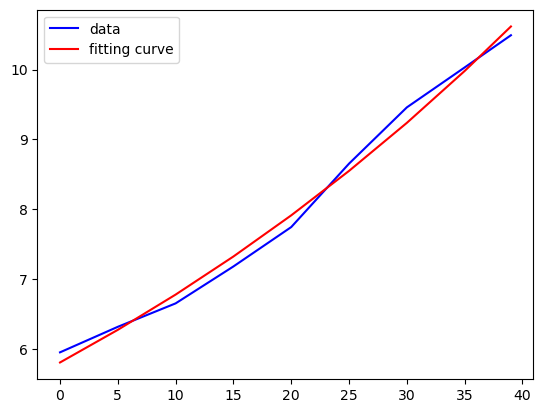

Population predictions[2007, 2017, 2025 and 2030]: [ 8.81940555 10.29242645 11.64610065 13.59123737]
Error for 2007 prediction: 0.025264638192425214
Error for 2017 prediction: 0.0021836856742510707


In [13]:
import numpy as np
import numpy.linalg as LA

# Evaluate the function value F_t
def Fval(x, y, beta):
    return beta[0]*np.exp(x*beta[1]) - y

# Evaluate the Jacobian J_t of F
def Jac(x, beta):
    return np.matrix([np.exp(x*beta[1]), beta[0]*(x*np.exp(beta[1]*x))])

# An implementation of Gauss-Newton scheme
def GN(Fx, Jac, x, y, beta0, maxiter = 100, tol = 1e-3):
    bet = beta0
    err = 0
    for t in range(0, maxiter):
        Ft = Fx(x, y, bet)
        Jt = Jac(x, bet)
        St = LA.pinv( Jt.dot(Jt.T) )
        yt = Jt.dot(Ft).T
        dt = np.ravel(St.dot(yt))
        bet = bet - dt
        err = LA.norm(yt)
        # print("Iteration:", t, "-- Error: ", err)
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return bet, err, t

# Call the Gauss-Newton solver.
beta0 = [1, 0.01] # The initial parameters
x_train = np.array([0, 5, 10, 15, 20, 25, 30, 35, 39])
y_train = np.array([5.957, 6.322, 6.657, 7.185, 7.748, 8.655, 9.459, 10.03, 10.49])
beta_best, err, n_it = GN(Fval, Jac, x_train, y_train, beta0)
# print("Parameters:", beta_best, "\nError: ", err, "\nNumber of Iterations: ", n_it)
print(beta_best)

# Using the scipy package
def nl_model(x, P0, beta):
     return P0 * np.exp(beta*x)

# Using curve_fit to solve the problem
from scipy.optimize import curve_fit
par_opt, par_cov = curve_fit(nl_model, x_train, y_train, p0=[1,0.01])
print(par_opt)

# Plot the data and its fitting curve.
from matplotlib import pyplot as plt
plt.plot(x_train, y_train, 'b-', label='data')
plt.plot(x_train, nl_model(x_train, *par_opt), 'r-', label='fitting curve')
plt.legend()
plt.show()

# Prediction
x_test = np.array([27,37,45,55])
print("Population predictions[2007, 2017, 2025 and 2030]:", beta_best[0]*np.exp(x_test*beta_best[1]))

print("Error for 2007 prediction:", abs(9.048 - beta_best[0]*np.exp(27*beta_best[1]))/9.048)
print("Error for 2017 prediction:",abs(10.27 - beta_best[0]*np.exp(37*beta_best[1]))/10.27)

Considering the following nonlinear regression model: y= f(x;β)+ε where f(x;β) := exp(β0x) / (β1 +β2x); x is one input variable, β0, β1, and β2 are model parameters, and β1 + β2x =/= 0, and ε is a zero mean Gaussian noise of variance σ^2 = 0.005. A dataset is generated from this model with β∗ = (−0.25, 2, 1)^⊤. Then a Gauss-Newton method to solve this nonlinear regression problem is implemented with a starting point of coefficients other than β∗. Then at the same time, solved using the scipy package and using the best model obtained to make predictions at xˆ1 = −0.5 and xˆ2 = 3, provided that y(−0.5) = 0.773324 and y(3) = 0.108320.

>>> Convergence achieved!
Parameters: [-0.27706077  1.97785842  0.95276816] 
Error:  0.00033000493652957606 
Number of Iterations:  2
Parameters(scipy): [-0.27706791  1.97785687  0.95275923]


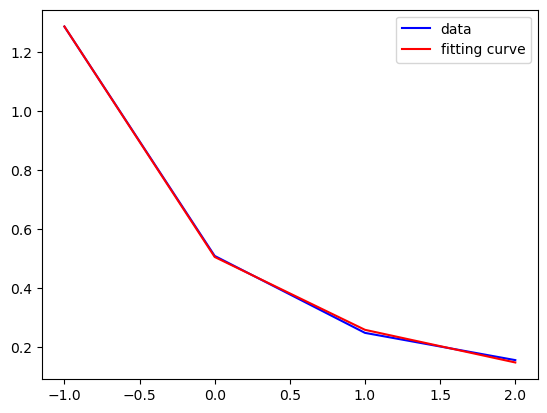

[0.01080121 0.16859517]
[0.23283398 0.20429731]


In [19]:
import numpy as np
import numpy.linalg as LA

# Evaluate the function value F_t
def Fval(x, y, beta):
    return np.exp(x*beta[0])/(beta[1] + beta[2]*x) - y

# Evaluate the Jacobian J_t of F
def Jac(x, beta):
    temp1 = np.exp(x*beta[0])
    temp2 = (beta[1] + beta[2]*x)
    temp3 = temp2**2
    return np.stack((x*temp1/temp2, -temp1/temp3, -x*temp1/temp3), axis=0)

# An implementation of Gauss-Newton scheme
def GN(Fx, Jac, x, y, beta0, maxiter = 100, tol = 1e-3):
    bet = beta0
    err = 0
    for t in range(0, maxiter):
        Ft = Fx(x, y, bet)
        Jt = Jac(x, bet)
        St = LA.pinv( Jt.dot(Jt.T) )
        yt = Jt.dot(Ft)
        dt = St.dot(yt)
        bet = bet - dt
        err = LA.norm(yt)
        # print("Iteration:", t, "-- Error: ", err)
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return bet, err, t

# Initialization
beta0 = [-0.2, 1.9, 0.9] # The initial parameters
beta_true = [-0.25, 2, 1]
def fVal(x, beta):
    return np.exp(x*beta[0])/(beta[1] + beta[2]*x)

x_train = np.array([-1, 0, 1, 2])
# y_train = fVal(x_train, beta_true) + 0.005*np.random.randn(4)
y_train = np.array([1.286714, 0.509169, 0.248306, 0.155943])

# Call the Gauss-Newton solver.
beta_best, err, n_it = GN(Fval, Jac, x_train, y_train, beta0)
print("Parameters:", beta_best, "\nError: ", err, "\nNumber of Iterations: ", n_it)
# print(beta_best)

# Using the scipy package
def nl_model(x, beta0, beta1, beta2):
     return np.exp(beta0*x) / (beta1 + beta2*x)

# Using curve_fit to solve the problem
from scipy.optimize import curve_fit
par_opt, par_cov = curve_fit(nl_model, x_train, y_train, p0=[-0.2, 1.9, 0.9])
print("Parameters(scipy):", par_opt)

# Plot the data and its fitting curve.
from matplotlib import pyplot as plt
plt.plot(x_train, y_train, 'b-', label='data')
plt.plot(x_train, nl_model(x_train, *par_opt), 'r-', label='fitting curve')
plt.legend()
plt.show()

# Prediction
x_test = np.array([-0.5,3])
print(abs((fVal(x_test, beta_best) - [0.773324, 0.108320])/[0.773324, 0.108320]))

x_test = np.array([-5,10])
print(abs((fVal(x_test, beta_best) - fVal(x_test, beta_true))/fVal(x_test, beta_true)))

Modifying the nonlinear regression model from the previous problem to minimize{ L(β) := 0.5 * (sum(i=1->i=n) of (yi − f(xi;β))^2 + (λ/2) * ∥β∥^2 } where λ = 0.1 is a given regularization parameter, and ∥β∥ is the Euclidean norm.

In [21]:
# An implementation of Gauss-Newton scheme with regularization
def GNreg(Fx, Jac, Lambda, x, y, beta0, maxiter = 100, tol = 1e-3):
    bet = beta0
    err = 0
    for t in range(0, maxiter):
        Ft = Fx(x, y, bet)
        Jt = Jac(x, bet)
        St = LA.pinv( Jt.dot(Jt.T) + Lambda*np.eye(Jt.shape[0]))
        yt = Jt.dot(Ft) + Lambda*bet
        dt = St.dot(yt)
        bet = bet - dt
        err = LA.norm(yt)
        # print("Iteration:", t, "-- Error: ", err)
        if err <= tol:
            print(">>> Convergence achieved!")
            break
    return bet, err, t

# Call the Gauss-Newton solver.
Lambda = 0.1
beta0 = np.array([-0.2, 1.9, 0.9]) # The initial parameters
x_train = np.array([-1, 0, 1, 2])
y_train = np.array([1.286714, 0.509169, 0.248306, 0.155943])
beta_best, err, n_it = GNreg(Fval, Jac, Lambda, x_train, y_train, beta0)
print("Parameters:", beta_best, "\nError: ", err, "\nNumber of Iterations: ", n_it)
# print(beta_best)

# Using the scipy package
def cost(beta):
     return (1/2)*LA.norm(Fval(x_train, y_train, beta))**2 + (Lambda/2)*LA.norm(beta)**2

# Using minimize to solve the problem
from scipy.optimize import minimize
res = minimize(cost, x0=np.array([-0.2, 1.9, 0.9]))
print("Parameters(scipy):", res.x)

# Prediction
beta_true = [-0.25, 2, 1]

x_test = np.array([-0.5,3])
print(abs((fVal(x_test, beta_best) - [0.773324, 0.108320])/[0.773324, 0.108320]))

x_test = np.array([-5,10])
print(abs((fVal(x_test, beta_best) - fVal(x_test, beta_true))/fVal(x_test, beta_true)))

>>> Convergence achieved!
Parameters: [-0.46883906  1.44119115  0.21670363] 
Error:  0.0007276737761957302 
Number of Iterations:  6
Parameters(scipy): [-0.46893481  1.44083353  0.21623966]
[0.22650075 0.0815135 ]
[26.05174882  0.62719529]


Generated a synthetic dataset in R^2 for practicing logistic regression and SVM, then used it to generate a set of data points in R^2 (integers between 0 and 50). Plotted this dataset in R^2 by marking RED for points with True labels and BLUE for points with False labels. With the tasks: 
Modeled a logistic regression using 80% data points out of 50. Solved this logistic regression problem and made a prediction on the remaining 20% points and calculated the errors.
Modeled an SVM problem using 80% data points as above but without misclassification. Then, used the remaining 20% data points to make a prediction, and computed the prediction errors.
Solve the tasks in from above but now using the model that can handle misclassification. Tuning the penalty parameter C to get a good prediction.

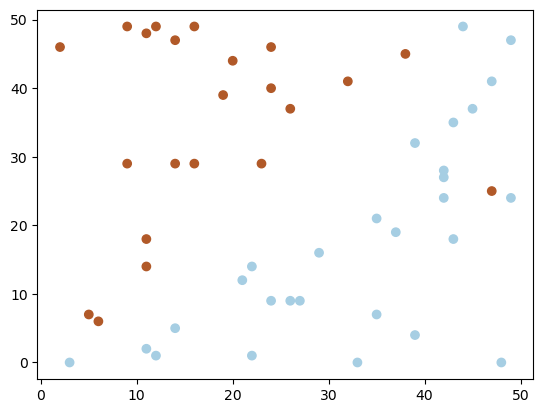

In [22]:
import numpy as np
from numpy import random as rg
import matplotlib.pyplot as plt

np.random.seed(69)
n = 50
X = np.zeros((n, 2))
X[:,0] = rg.randint(0, 50, n)
X[:,1] = rg.randint(0, 50, n)
y = (X[:,1] - X[:,0] + 1 >= 0)
rid = rg.randint(0, n, int(0.05*n))
y[rid] = ~y[rid]

X_train = X
Y_train = y
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Paired)
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from cvxopt import matrix, solvers

train_index = np.random.choice(n, int(n*0.8), replace=False)
test_index = np.setdiff1d(np.array(range(n)), train_index)
X_train = X[train_index,:]
Y_train = y[train_index]
X_test = X[test_index,:]
Y_test = y[test_index]

"""
Logistic regression
"""
my_logist = LogisticRegression(C=1e5)
my_logist.fit(X_train, Y_train)

# Computing the predicted error
Y_predict = my_logist.predict(X_test)
test_err = np.sum(Y_predict != Y_test)/len(Y_test)
print("Test Error of Logistic Regression: ", test_err)

"""
SVM without misclassification
"""
# dimension of variable is d+1
n_train, d = X_train.shape
Y_train_num = np.array([1 if x else -1 for x in Y_train])
Y_test_num = np.array([1 if x else -1 for x in Y_test])

# Form the matrix Q and vector p.
Q = np.zeros((d+1, d+1))
Q[0:d, 0:d] = np.eye(d)
p = np.zeros(d+1)

# Form inequality constraints.
G = -np.concatenate((np.diag(Y_train_num).dot(X_train), Y_train_num.reshape(n_train,1)), axis=1) # the main constraint of SVM
h = -np.ones(n_train)

# Convert them into cvxopt matrix form.
Q = matrix(Q)
p = matrix(p)
G = matrix(G)
h = matrix(h)
# Call the solver.
try:
    sol=solvers.qp(Q, p, G, h)
    w = sol["x"][0:d]
    u = sol["x"][d]
    # Compute the test error
    Y_predict = X_test.dot(w).ravel() + u
    Y_predict = [1 if x > 0 else -1 for x in Y_predict]
    test_error = sum(Y_predict != Y_test_num)/Y_test_num.shape[0]
    print('Test error of SVM without misclassification:', test_error)
except:
    print("The problem is not feasible")

"""
SVM with misclassification
"""
C = [0.01, 0.1, 1, 10, 100]
for c in C:
    my_svm = svm.SVC(kernel="linear", C=c)
    my_svm.fit(X_train, Y_train)

    # Computing the predicted error
    Y_predict = my_svm.predict(X_test)
    test_err = np.sum(Y_predict != Y_test)/len(Y_test)
    print("Test Error of SVM with misclassification: ", test_err, ",C:", c)

Test Error of Logistic Regression:  0.2
     pcost       dcost       gap    pres   dres
 0:  1.4501e-03  3.3303e+01  2e+02  2e+00  1e+03
 1:  1.2716e-02 -1.1600e+01  8e+01  1e+00  5e+02
 2:  2.6408e-02  4.2067e+01  7e+01  9e-01  5e+02
 3:  1.2940e-01 -3.5458e+00  1e+02  7e-01  4e+02
 4:  5.5919e-01 -6.9390e+01  7e+01  2e-01  9e+01
 5:  8.1247e-01 -3.2536e+01  3e+01  7e-02  4e+01
 6:  7.9385e-01 -1.9895e-02  8e-01  5e-15  7e-15
 7:  4.7784e-01  3.9215e-01  9e-02  3e-15  7e-15
 8:  4.7469e-01  4.7377e-01  9e-04  4e-15  3e-15
 9:  4.7462e-01  4.7461e-01  9e-06  4e-15  1e-14
10:  4.7462e-01  4.7462e-01  9e-08  4e-15  1e-14
Optimal solution found.
Test error of SVM without misclassification: 0.2
Test Error of SVM with misclassification:  0.2 ,C: 0.01
Test Error of SVM with misclassification:  0.2 ,C: 0.1
Test Error of SVM with misclassification:  0.2 ,C: 1
Test Error of SVM with misclassification:  0.2 ,C: 10
Test Error of SVM with misclassification:  0.2 ,C: 100


Using a diabetes dataset of 80 patient records with 5 medical indices (features), and the last column is the outcome (i.e. “YES” if the patient has diabetes, and “NO” if not).
Formed an SVM model using this dataset without misclassification. Verify if the problem is feasible or not by solving it through a QP solver (e.g., CVXOPT) or the sklearn package.
Allowing misclassification, solved the SVM from before and played with different penalty parameter values C to get the best model for my prediction.
Used only 80% of the data to train the model, and the 20% remaining data to make prediction. Computed the prediction errors.

In [25]:
import pandas as pd
import numpy as np
from sklearn import svm
from cvxopt import matrix, solvers
data = pd.read_excel('diabetes-hw4.xls')
data = data.to_numpy()
X_train = np.array(data[:,1:6], dtype=float)
Y_train = np.array([1 if x == "YES" else -1 for x in data[:, 6]])

"""
SVM without misclassification
"""
# dimension of variable is d+1
n_train, d = X_train.shape

# Form the matrix Q and vector p.
Q = np.zeros((d+1, d+1))
Q[0:d, 0:d] = np.eye(d)
p = np.zeros(d+1)

# Form inequality constraints.
G = -np.concatenate((np.diag(Y_train).dot(X_train), Y_train.reshape(n_train,1)), axis=1) # the main constraint of SVM
h = -np.ones(n_train)

# Convert them into cvxopt matrix form.
Q = matrix(Q)
p = matrix(p)
G = matrix(G)
h = matrix(h)
# Call the solver.
try:
    sol=solvers.qp(Q, p, G, h)
except:
    print("The problem is not feasible")

"""
SVM with misclassification
"""
C = [0.01, 0.1, 1, 10, 100]
for c in C:
    my_svm = svm.SVC(kernel="linear", C=c)
    my_svm.fit(X_train, Y_train)

    # Computing the predicted error
    Y_predict = my_svm.predict(X_train)
    test_err = np.sum(Y_predict != Y_train)/len(Y_train)
    print("Test Error of SVM with misclassification: ", test_err, ",C:", c)

     pcost       dcost       gap    pres   dres
 0:  6.1598e-04  1.4480e+02  3e+02  3e+00  2e+03
 1:  5.1651e-05  3.6149e+02  9e+01  1e+00  7e+02
 2:  2.7818e-05  9.4778e+02  2e+02  1e+00  7e+02
 3:  1.6765e-05  2.8124e+03  3e+02  1e+00  7e+02
 4:  1.3187e-05  5.8680e+03  6e+02  1e+00  6e+02
 5:  1.4261e-05  6.0035e+03  6e+02  1e+00  6e+02
 6:  2.5275e-06  4.4658e+04  2e+03  1e+00  6e+02
 7:  7.0872e-07  5.9093e+05  1e+04  1e+00  6e+02
 8:  2.0522e-08  2.4263e+07  9e+04  1e+00  6e+02
 9:  2.7303e-11  6.5872e+09  9e+05  1e+00  6e+02
10:  6.9360e-15  5.0011e+13  1e+08  1e+00  6e+02
11:  6.9466e-19  2.3992e+19  5e+11  1e+00  8e+04
12:  7.4086e-23  1.1489e+27  2e+17  1e+00  3e+12
13:  3.4044e-25  4.9462e+36  7e+25  1e+00  4e+22
14:  5.7088e-26  1.0638e+45  2e+34  1e+00  4e+30
15:  7.3182e-25  8.9218e+53  1e+43  1e+00  6e+39
16:  1.9508e-25  1.1343e+63  2e+52  1e+00  8e+48
17:  2.9336e-25  6.5355e+71  9e+60  1e+00  4e+57
18:  2.2491e-25  1.2620e+80  2e+69  1e+00  4e+65
19:  2.6029e-26  3.35

In [27]:
"""
Using 80% data to train and 20% data to test
"""
n = len(data)
train_index = np.random.choice(n, int(n*0.8), replace=False)
test_index = np.setdiff1d(np.array(range(n)), train_index)
X_train = np.array(data[train_index,1:6], dtype=float)
Y_train = np.array([1 if x == "YES" else -1 for x in data[train_index, 6]])
X_test = np.array(data[test_index,1:6], dtype=float)
Y_test = np.array([1 if x == "YES" else -1 for x in data[test_index, 6]])

C = [0.01, 0.1, 1, 10, 100, 500, 1000]
for c in C:
    my_svm = svm.SVC(kernel="linear", C=c)
    my_svm.fit(X_train, Y_train)

    # Computing the predicted error
    Y_predict = my_svm.predict(X_test)
    test_err = np.sum(Y_predict != Y_test)/len(Y_test)
    print("Test Error of SVM with misclassification: ", test_err, ",C:", c)

Test Error of SVM with misclassification:  0.1875 ,C: 0.01
Test Error of SVM with misclassification:  0.1875 ,C: 0.1
Test Error of SVM with misclassification:  0.1875 ,C: 1
Test Error of SVM with misclassification:  0.1875 ,C: 10
Test Error of SVM with misclassification:  0.25 ,C: 100
Test Error of SVM with misclassification:  0.3125 ,C: 500
Test Error of SVM with misclassification:  0.4375 ,C: 1000


Matrix factorization where M = [[19,20,8,16],[17,20,14,18],[26,28,13,23]] is a given matrix in R^3x4 . Using SVD to solve (MF) in two cases: r = 1 for the first case, and r = 2 for the second case, respectively. MF is f(u,v):= 0.5 * ∥uv^⊤−M∥^2 where the norm in question is the Frobenius norm.

In [28]:
import numpy as np
from numpy import linalg as la

M = np.array([[19,20,8,16],[17,20,14,18],[26,28,13,23]])
U, S, V = la.svd(M)

# r = 1
U1 = U[:,0:1]
V1t = V[0:1,:]
S1 = np.diag(S[0:1])
U_star = U1.dot(S1)
V_star = V1t.T
M1 = U_star.dot(V_star.T)
print(M1)

# r = 2
U2 = U[:,0:2]
V2t = V[0:2,:]
S2 = np.diag(S[0:2])
U_star = U2.dot(S2)
V_star = V2t.T
M2 = U_star.dot(V_star.T)
print(M2)

[[17.91972742 19.61916929 10.00311793 16.41381884]
 [18.86955903 20.65907948 10.53333123 17.28383006]
 [25.37256787 27.77881006 14.1634291  23.24034974]]
[[19. 20.  8. 16.]
 [17. 20. 14. 18.]
 [26. 28. 13. 23.]]


Let M = [[12,8,8],[22,12,14],[26,20,18]] I approximated this as a rank 2 matrix, UV^T but modeled the problem as an optimization one to minimize f(U,V) := 0.5 * ∥UV^⊤ − M∥^2 using the Frobenius norm. Solved using single value decomposition as well as an alternating minimization algorithm.

In [29]:
import numpy as np
from scipy import linalg as la

M = np.array([[12,8,8],[22,12,14],[26,20,18]])

# SVD decomposition
U, S, V = la.svd(M)
U2 = U[:,0:2]
V2t = V[0:2,:]
S2 = np.diag(S[0:2])
U_star = U2.dot(S2)
V_star = V2t.T
M2 = U_star.dot(V_star.T)
print("U = ", U_star)
print("V = ", V_star)
print("Objective value = ", 0.5*la.norm( U_star.dot(V_star.T) - M, ord='fro'))

# AMA method
import numpy as np
from scipy import linalg as la
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=False)

m, n = 3, 3
# This function solve the subproblem (1), where y = np.matrix.flatten(M.T)
def LS4V(U, y, n):
    X = np.kron(np.identity(n), U)
    lin_reg.fit(X, y)
    return np.reshape(lin_reg.coef_.copy(), (n, -1))

# This function solve the subproblem (2), where y = np.matrix.flatten(M.T)
def LS4U(V, y, m):
    X = np.kron(V, np.identity(m))
    lin_reg.fit(X, y)
    return np.reshape(lin_reg.coef_.copy(), (-1, m)).T

def AMA(U0, m, n, M, maxit=3):
    Ut = U0
    y = np.matrix.flatten(M.T)
    for t in range(0, maxit):
        Vt = LS4V(Ut, y, n)
        Ut = LS4U(Vt, y, m)
        fx =  0.5*np.linalg.norm( Ut.dot(Vt.T) - M, ord='fro')
        print("Iteration: {0:2d}".format(t), "-- Objective Value: {0:5.4e}".format(fx))
    return Ut, Vt, fx

U0 = np.array([[1, 0], [0, 1], [1, 1]])
U_star, V_star, fx = AMA(U0, m,  n, M, maxit=10)

print("U = ", U_star)
print("V = ", V_star)
print("Objective value = ", fx)


U =  [[-16.491916    -0.12925452]
 [-28.60090368  -2.44710207]
 [-37.36676031   1.93008397]]
V =  [[-0.72343664 -0.53494228]
 [-0.49169298  0.84298219]
 [-0.48464156 -0.05672559]]
Objective value =  9.769962616701378e-15
Iteration:  0 -- Objective Value: 8.2844e-15
Iteration:  1 -- Objective Value: 6.6168e-15
Iteration:  2 -- Objective Value: 6.2172e-15
Iteration:  3 -- Objective Value: 1.1409e-14
Iteration:  4 -- Objective Value: 4.3963e-15
Iteration:  5 -- Objective Value: 6.0890e-15
Iteration:  6 -- Objective Value: 7.5886e-15
Iteration:  7 -- Objective Value: 9.0577e-15
Iteration:  8 -- Objective Value: 6.7787e-15
Iteration:  9 -- Objective Value: 1.5281e-14
U =  [[ 0.25  0.5 ]
 [-0.75  1.5 ]
 [ 1.75  0.5 ]]
V =  [[ 9.33333333 19.33333333]
 [ 8.         12.        ]
 [ 6.66666667 12.66666667]]
Objective value =  1.5280799322856756e-14


Minimized the rosenbrock function f(x1,x2)=(x1−a)^2 +b(x2 −x1^2)^2. Plotted the surface and contour of this function in R^3 with a = 1 and b = 1 using matplotlib. Found the stationary points of the function from its Fermat’s rule and determine if the obtained stationary points are maximizer or minimizers (local or global). Implemented the gradient descent method to solve.

In [30]:
from numpy import linalg as la
import numpy as np

# Implementation of the Gradient Descent method
def GD(obj_func, obj_grad, eta, x0, max_iter=int(1e4), tol=1e-4):
    print("An implementation of GD")
    p_step = 100
    
    # Initialization step
    x_cur = x0
    
    # Store iterates
    hist = []
    
    # The main loop
    for t in range(0, max_iter):
        
        # Evaluate the value and gradient of objective function
        grad_fx = obj_grad(x_cur)
        if t % p_step == 0:
            fx_val  = obj_func(x_cur)
        
        # Compute the relative error and store it
        rel_err = la.norm(grad_fx)/np.maximum(1, la.norm(x_cur))
        if t % p_step == 0:
            hist.append([t, fx_val, rel_err])
        
        # Print out the iteration
        if t % p_step == 0:
            print("Iter={:4d}, F(x)={:^3.4e}, Error={:^3.4e}".format(t, fx_val, rel_err))
         
        # Check the stopping critterion
        if rel_err <= tol:
            print("Convergence achieved!")
            break
        
        # Update the next iterate
        x_cur = x_cur - eta*grad_fx
    
    # Print a message if it exceeds the maximum number of iterations
    if t >= max_iter:
        print("Exceed the maximum number of iterations. Increase max_iter to run more!")
        
    return dict(x_cur=x_cur, fx_val=fx_val, rel_err=rel_err, hist=np.array(hist))

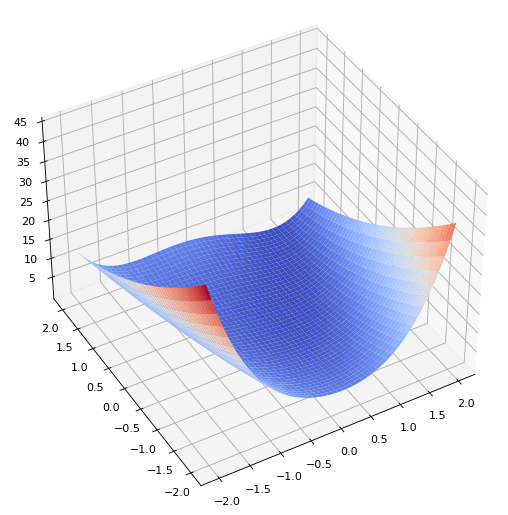

An implementation of GD
Iter=   0, F(x)=1.0000e+00, Error=2.0000e+00
Iter= 100, F(x)=1.2689e-01, Error=3.7536e-01
Iter= 200, F(x)=4.6596e-02, Error=2.0661e-01
Iter= 300, F(x)=1.9550e-02, Error=1.1337e-01
Iter= 400, F(x)=8.7746e-03, Error=6.8024e-02
Iter= 500, F(x)=4.0951e-03, Error=4.3357e-02
Iter= 600, F(x)=1.9583e-03, Error=2.8649e-02
Iter= 700, F(x)=9.5137e-04, Error=1.9367e-02
Iter= 800, F(x)=4.6711e-04, Error=1.3290e-02
Iter= 900, F(x)=2.3101e-04, Error=9.2118e-03
Iter=1000, F(x)=1.1481e-04, Error=6.4291e-03
Iter=1100, F(x)=5.7262e-05, Error=4.5084e-03
Iter=1200, F(x)=2.8628e-05, Error=3.1719e-03
Iter=1300, F(x)=1.4337e-05, Error=2.2368e-03
Iter=1400, F(x)=7.1883e-06, Error=1.5800e-03
Iter=1500, F(x)=3.6072e-06, Error=1.1173e-03
Iter=1600, F(x)=1.8112e-06, Error=7.9074e-04
Iter=1700, F(x)=9.0984e-07, Error=5.5995e-04
Iter=1800, F(x)=4.5718e-07, Error=3.9668e-04
Iter=1900, F(x)=2.2977e-07, Error=2.8109e-04
Iter=2000, F(x)=1.1550e-07, Error=1.9923e-04
Iter=2100, F(x)=5.8062e-08, Err

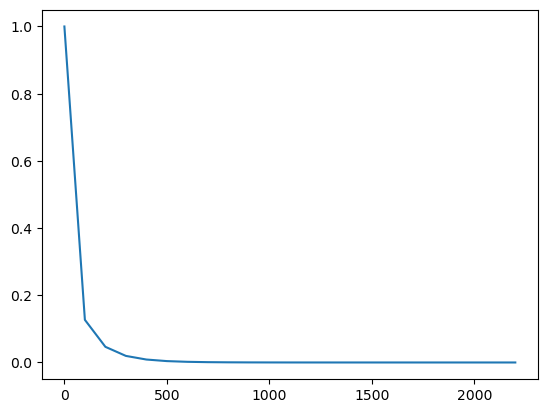

In [31]:
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from numpy import linalg as la
import numpy as np

# Define the function and its derivative
a = 1
b = 1
fx    = lambda x: (x[0] - a)**2 + b*(x[1] - x[0]**2)**2
dfx   = lambda x: np.array([2*(x[0] - a) + 4*b*(x[0]**2 - x[1])*x[0], 2*b*(x[1] - x[0]**2)])

# Form a meshgrid for plotting
x_org = np.linspace(-2, 2, 50)
y_org = np.linspace(-2, 2, 50)
X, Y  = np.meshgrid(x_org, y_org)
Z = (X - a)**2 + b*(Y - X**2)**2

# Create a figure.
fig = plt.figure(figsize=(8, 8), dpi=80)
ax = plt.axes(projection='3d')

# Plot the surface.
# ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.25, cmap=cm.coolwarm)
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)

# Check the view.
ax.view_init(40, -120)
plt.show()

x0 = np.array([0,0])
eta = 1e-2
sol = GD(fx, dfx, eta, x0, max_iter=int(1e4), tol=1e-4)

plt.plot(sol["hist"][:,0], sol["hist"][:,1])

Considering a nonliner least squares problem that doubles as a one layer neural network, f(β):= (1/n) * sum(i=0->i=n) of (σ(x^T * β)−yi)^2. Where σ(τ) = max{0,τ} is a ReLU function, and it can be viewed as a simple neural network training problem of the model y = σ(x^T * β) with one layer. Produced a synthetic dataset and the solved it using the gradient descent method after playing with initial points and learning rates.

In [32]:
n, d = 100, 10 # The demension of problem, students can change both n and d.
sig = 0.05 # This is the variance of noise, students can change this value
import numpy as np
from sklearn import preprocessing as pp
X_data = np.random.randn(n, d)
X_data = pp.normalize(X_data,axis=0)
beta_truth = np.random.randn(d+1)
X = np.concatenate((np.ones((n,1)), X_data), axis=1)
y = np.maximum(0, X.dot(beta_truth)) + sig*np.random.randn(n)

def fx_eval(beta, X, y):
    n = X.shape[0]
    fx = 0
    for i in range(n):
        x = X[i,:]
        temp = x.dot(beta)
        fx = fx + (max(0, temp) - y[i])**2
    return (1/n)*fx

def grad_fx_eval(beta, X, y):
    n = X.shape[0]
    gradx = np.zeros_like(beta)
    for i in range(n):
        x = X[i,:]
        temp = x.dot(beta)
        if temp >= 0:
            gradx = gradx + 2*(max(0, temp) - y[i])*x
    return (1/n)*gradx

x0 = np.zeros(d+1)
eta = 1e-1
fx  = lambda v: fx_eval(v, X, y)
dfx = lambda v: grad_fx_eval(v, X, y)
sol = GD(fx, dfx, eta, x0, max_iter=int(1e4), tol=1e-4)

An implementation of GD
Iter=   0, F(x)=4.1739e-01, Error=1.1334e+00
Iter= 100, F(x)=6.1488e-02, Error=5.2658e-02
Iter= 200, F(x)=3.9650e-02, Error=3.4008e-02
Iter= 300, F(x)=2.6294e-02, Error=2.0959e-02
Iter= 400, F(x)=1.8004e-02, Error=1.4116e-02
Iter= 500, F(x)=1.2782e-02, Error=9.9806e-03
Iter= 600, F(x)=9.4544e-03, Error=7.4684e-03
Iter= 700, F(x)=7.2500e-03, Error=5.7317e-03
Iter= 800, F(x)=5.7736e-03, Error=4.4866e-03
Iter= 900, F(x)=4.7734e-03, Error=3.5697e-03
Iter=1000, F(x)=4.0875e-03, Error=2.8798e-03
Iter=1100, F(x)=3.6112e-03, Error=2.3516e-03
Iter=1200, F(x)=3.2759e-03, Error=1.9819e-03
Iter=1300, F(x)=3.0276e-03, Error=1.6103e-03
Iter=1400, F(x)=2.8558e-03, Error=1.3685e-03
Iter=1500, F(x)=2.7276e-03, Error=1.1732e-03
Iter=1600, F(x)=2.6205e-03, Error=1.0901e-03
Iter=1700, F(x)=2.5343e-03, Error=9.5433e-04
Iter=1800, F(x)=2.4668e-03, Error=8.3977e-04
Iter=1900, F(x)=2.4137e-03, Error=7.4225e-04
Iter=2000, F(x)=2.3716e-03, Error=6.5854e-04
Iter=2100, F(x)=2.3338e-03, Err

This is similar code for the same type of problem, with more interesting graphical representations

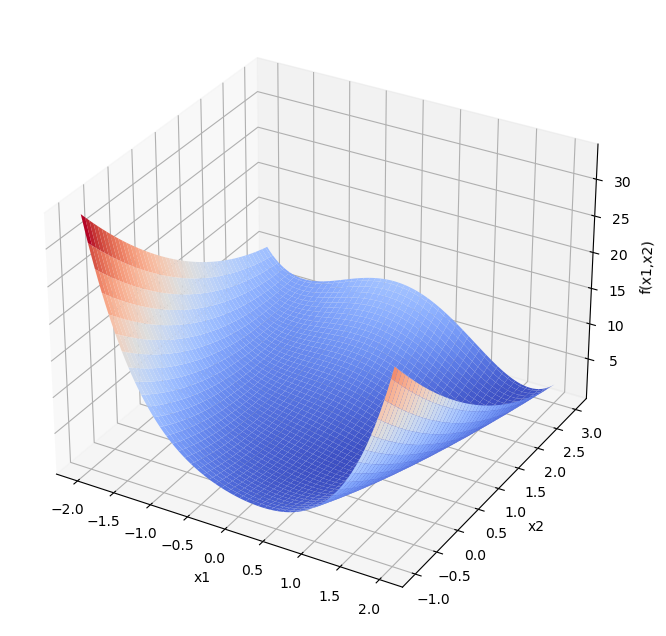

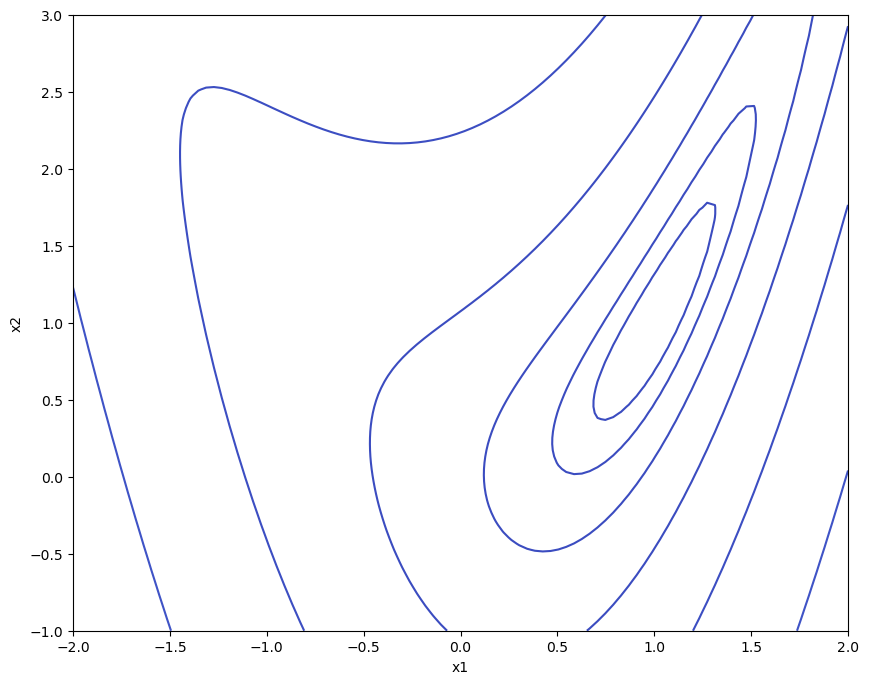

[(1, 1)]
Solution (1, 1): Eigenvalues of Hessian: [0.3431457505076198, 11.65685424949238]
[-4*x1*(-x1**2 + x2) + 2*x1 - 2, -2*x1**2 + 2*x2]


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock(x1, x2, a=1, b=1):
    return (x1 - a)**2 + b*(x2 - x1**2)**2

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-1, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = rosenbrock(X1, X2)

ax.plot_surface(X1, X2, Z, cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)')
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))

ax.contour(X1, X2, Z, levels=np.logspace(-1, 3, 10), cmap='coolwarm')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()

from sympy import symbols, diff, solve

x1, x2 = symbols('x1 x2')
f = (x1 - 1)**2 + (x2 - x1**2)**2
grad_f = [diff(f, x1), diff(f, x2)]
solutions = solve(grad_f, [x1, x2])
print(solutions)

from sympy import Matrix, hessian

#only found one solution so designed the code to handle a single solution
hessian_f = hessian(f, [x1, x2])

def eigenvals_num(x1_val, x2_val):
    hessian_f_val = hessian_f.subs([(x1, x1_val), (x2, x2_val)])
    eigvals = Matrix([hessian_f_val]).eigenvals()
    return [float(eigval) for eigval in eigvals]

for sol in solutions:
    hessian_f_sol = hessian_f
    eigvals = eigenvals_num(1, 1)
    #Matrix([hessian_f_sol]).eigenvals()
    print(f'Solution {sol}: Eigenvalues of Hessian: {eigvals}')
    
print(grad_f)

Iter:    0,  Error: 2.000e+00,  F(x): 5.000e+00
Iter:    1,  Error: 1.789e+00,  F(x): 4.640e+00
Iter:    2,  Error: 1.834e+00,  F(x): 4.316e+00
Iter:    3,  Error: 1.891e+00,  F(x): 3.975e+00
Iter:    4,  Error: 1.958e+00,  F(x): 3.611e+00
Iter:    5,  Error: 2.040e+00,  F(x): 3.220e+00
Iter:    6,  Error: 2.136e+00,  F(x): 2.794e+00
Iter:    7,  Error: 2.237e+00,  F(x): 2.328e+00
Iter:    8,  Error: 2.317e+00,  F(x): 1.818e+00
Iter:    9,  Error: 2.305e+00,  F(x): 1.280e+00
Iter:   10,  Error: 2.080e+00,  F(x): 7.696e-01
Iter:   11,  Error: 1.561e+00,  F(x): 3.850e-01
Iter:   12,  Error: 9.047e-01,  F(x): 1.900e-01
Iter:   13,  Error: 4.752e-01,  F(x): 1.289e-01
Iter:   14,  Error: 3.523e-01,  F(x): 1.101e-01
Iter:   15,  Error: 3.213e-01,  F(x): 9.832e-02
Iter:   16,  Error: 3.008e-01,  F(x): 8.833e-02
Iter:   17,  Error: 2.825e-01,  F(x): 7.956e-02
Iter:   18,  Error: 2.658e-01,  F(x): 7.182e-02
Iter:   19,  Error: 2.505e-01,  F(x): 6.496e-02
Iter:   20,  Error: 2.365e-01,  F(x): 5.

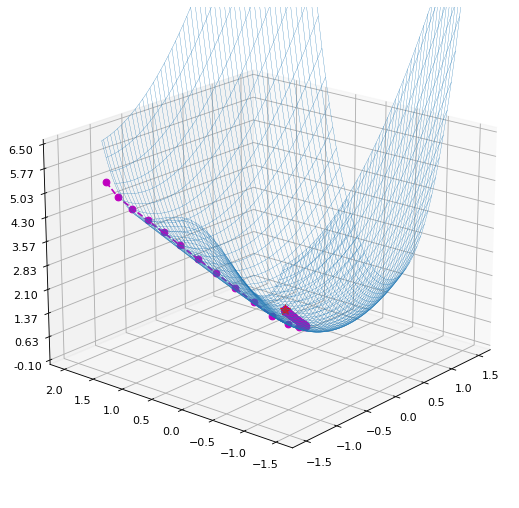

In [34]:
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from numpy import linalg as la
import numpy as np
from sympy import symbols, diff

# Define the function and its derivative
fx    = lambda x1, x2: (x1 - 1)**2 + (x2 - x1**2)**2
dfx   = lambda x1, x2:  (2*((2*x1**3) - 2*x1*x2 + x1 - 1), 2*(x2 - x1**2))

def my_gd2(fx, dfx, x0, y0, eta=0.1, maxit=100, tol=1e-5):
    x, y = x0, y0
    xc, yc, fc, dc = [], [], [], []
    for t in range(0, maxit):
        fval = fx(x, y)
        dx, dy = dfx(x, y)
        res = la.norm([dx, dy])
        xc.append(x)
        yc.append(y)
        fc.append(fval)
        dc.append(res)
        print("Iter: {0:4d}, ".format(t), "Error: {0:6.3e}, ".format(res), "F(x): {0:6.3e}".format(fval))
        if res <= tol:
            print("Convergence achieved!")
            break
        x = x - eta*dx
        y = y - eta*dy
    return x, y, fval, xc, yc, fc, dc

x0, y0 = -1, 2
x1, y1, f1, xc1, yc1, fc1, dc1 = my_gd2(fx, dfx, x0, y0, eta=0.1, maxit=1000, tol=1e-8)
print("Solution: x_opt = {0:3.6f},".format(x1), "y_opt = {0:3.6f}".format(y1))
print("Optimal value: {0:3.6f}\n".format(f1))

# Compute the set of minimizers.
import math as M
s = np.linspace(-M.pi, M.pi, 100)
xs = [M.sqrt(2)*M.sin(s[v]) for v in range(0, s.size)] 
ys = [M.sqrt(2)*M.cos(s[v]) for v in range(0, s.size)]
zs = 0*s

# Form a meshgrid for plotting
x_org = np.linspace(-1.5, 1.5, 100)
y_org = np.linspace(-1.5, 1.5, 100)
X, Y  = np.meshgrid(x_org, y_org)
Z = fx(X, Y)

# Create a figure.
fig = plt.figure(figsize=(8, 8), dpi=80)
ax = plt.axes(projection='3d')

# Plot the surface.
ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2, linewidth=0.25, cmap=cm.coolwarm)
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, facecolors=None)

# Plot the data generated by two GD runs.
ax.plot(xc1, yc1, fc1, '--om')

# The optimizers
ax.plot(1, 1, 0, marker='*', color='r', markersize=10)

# Customize the z axis.
ax.set_zlim(-0.1, 6.5)
ax.zaxis.set_major_locator(LinearLocator(10))

# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Check the view.
ax.view_init(20, -140)
plt.show()

Considering the following digital logic gate (or function) F(X1, X2): X1=[1,1,0,0]^T X2=[1,0,1,0]^T F(X1, X2)=[0,1,0,1]^T. Then selected three out of four examples given to approximate the function F by a linear model of the form Y = β0 + β1 X1 + β2 X2 using linear least-squares from linear regression. Used the remaining point to make prediction. Shuffled the data and tried with other three examples to find a combination that works best.

In [1]:
import numpy as np
from numpy import linalg as la
from sklearn.linear_model import LinearRegression
import math

X = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([0,1,0,1])
indexs = [0,1,2,3]
error_hist = []
beta_hist = []

for i in indexs:
    
    # train on the data X without the i-th row
    indexs_cur = indexs.copy()
    indexs_cur.pop(i)
    X_train = X[indexs_cur,:]
    y_train = y[indexs_cur]
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
        
    y_predict = X.dot(lin_reg.coef_) + lin_reg.intercept_
    error_cur = (y_predict - y).dot(y_predict - y)
    error_hist.append(error_cur)

    beta_cur = np.zeros(3)
    beta_cur[0:2] = lin_reg.coef_
    beta_cur[2] = lin_reg.intercept_
    beta_hist.append(beta_cur)

print(error_hist)

[2.465190328815662e-32, 2.711709361697228e-31, 3.2047474274603605e-31, 3.2047474274603605e-31]


Instead of using linear model, now used nonlinear model: Y = σ(β0 + β1X1 + β2X2), where σ(τ) = 1/(1+e^(−τ)) is a sigmoid function. Used this model and three examples to solve the corresponding non-linear regression problem to determine β = (β0, β1, β2). Used the remaining point to make a prediction. Compared the result with the linear model in the previous block.

In [2]:
from scipy.optimize import curve_fit

error_hist = []
beta_hist = []

def nl_model(x, beta0, beta1, beta2):
    x0, x1 = x
    return 1/( 1 + np.exp(-(beta0*x0 + beta1*x1 + beta2)))

for i in indexs:
    
    # train on the data X without the i-th row
    indexs_cur = indexs.copy()
    indexs_cur.pop(i)
    x0_train = X[indexs_cur, 0]
    x1_train = X[indexs_cur, 1]
    y_train = y[indexs_cur]
    par_opt, par_cov = curve_fit(nl_model, (x0_train, x1_train), y_train, p0=[0.1,0.1,0.1])
    
    y_predict = nl_model((X[:,0], X[:,1]), par_opt[0], par_opt[1], par_opt[2])
    error_cur = (y_predict - y).dot(y_predict - y)
    error_hist.append(error_cur)
    beta_hist.append(par_opt)

print(error_hist)

[5.866265982595532e-20, 5.903023231168233e-19, 6.83104014091989e-20, 1.2074934522282131e-19]


/Users/lc2/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Built a feedforward neural network with one hidden layer to approximate this function using ReLU and sigmoid activation functions and the sum-of-square loss. Used both three examples and the full dataset from the previous 2 blocks to test the code.

In [3]:
import tensorflow as tf
import numpy as np

X = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([0,1,0,1])
indexs = [0,1,2,3]
error_hist = []
beta_hist = []

# test full dataset
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics = ['accuracy'])

model.fit(X, y, epochs=100, verbose=0)
y_predict = model.predict(X).round()
acc = sum(y_predict.ravel()==y)/len(y)
print(acc)

# test with three examples
acc_hist = []
y_predict_hist = []

for i in indexs:
    
    indexs_cur = indexs.copy()
    indexs_cur.pop(i)
    X_train = X[indexs_cur, :]
    y_train = y[indexs_cur]
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
        ])

    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics = ['accuracy'])

    model.fit(X_train, y_train, epochs=100, verbose=0)
    y_predict = model.predict(X).round()
    
    acc_hist.append(sum(y_predict.ravel()==y)/len(y))
    y_predict_hist.append(y_predict)
print(acc_hist)

2023-05-08 17:54:13.730266: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 0s 81ms/step
1.0
1/1 [==============================] - 0s 52ms/step
[0.75, 0.5, 1.0, 0.75]


Worked with the fashion MNIST dataset to build a some feedforward neural networks to classify an image into one of the two classes: Shirt or Other.

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# shirt correpsonds to label 6
train_labels_shirt = np.array(train_labels == 6, dtype='uint8')
test_labels_shirt = np.array(test_labels == 6, dtype='uint8')

model_shirt = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model_shirt.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_shirt.fit(train_images, train_labels_shirt, epochs=10)
test_loss, test_acc = model_shirt.evaluate(test_images,  test_labels_shirt, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6421 - accuracy: 0.9023
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1781 - accuracy: 0.9258
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1725 - accuracy: 0.9275
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1725 - accuracy: 0.9276
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1706 - accuracy: 0.9297
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1695 - accuracy: 0.9286
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1658 - accuracy: 0.9293
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1638 - accuracy: 0.9303
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1644 - accuracy: 0.9309
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.162

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model_shirt = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

model_shirt.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_shirt.fit(train_images, train_labels_shirt, epochs=10)
test_loss, test_acc = model_shirt.evaluate(test_images,  test_labels_shirt, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0048 - accuracy: 0.8976
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2326 - accuracy: 0.9097
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2057 - accuracy: 0.9168
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2019 - accuracy: 0.9132
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1947 - accuracy: 0.9156
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1851 - accuracy: 0.9236
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1726 - accuracy: 0.9266
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1681 - accuracy: 0.9284
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1628 - accuracy: 0.9301
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.16

Instead of classifying images into two classes as originally done, this will classify images into three classes:
– Class 1 has four categories: Shirt, T-shirt, pullover, and coat; 
– Class 2 has Trouser and Dress;
– Class 3 has other remaining categories.

In [6]:
import tensorflow as tf
import numpy as np

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_labels_3 = np.array([0 if x in [6, 0, 2, 4] else 1 if x in [1, 3] else 2 for x in train_labels], dtype='uint8')
test_labels_3 = np.array([0 if x in [6, 0, 2, 4] else 1 if x in [1, 3] else 2 for x in test_labels], dtype='uint8')

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_3.fit(train_images, train_labels_3, epochs=10)
test_loss, test_acc = model_3.evaluate(test_images,  test_labels_3, verbose=2)

# more complicated neural network
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3)
])

model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_3.fit(train_images, train_labels_3, epochs=10)
test_loss, test_acc = model_3.evaluate(test_images,  test_labels_3, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7922 - accuracy: 0.9419
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1338 - accuracy: 0.9583
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1180 - accuracy: 0.9606
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1153 - accuracy: 0.9619
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1083 - accuracy: 0.9640
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1065 - accuracy: 0.9642
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1042 - accuracy: 0.9649
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1057 - accuracy: 0.9657
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1035 - accuracy: 0.9658
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.096

Given the following function: f(x) = log(1+e^x) + 5xlog(x), where x ≥ 0. The goal was to compute the derivative f'(x) of this function at a given point x using autodiff techniques. Forward and backward, at select points with a comparison to the classical calculated values

In [7]:
import tensorflow as tf
import numpy as np

# forward-mode autodiff
x = tf.Variable(10.0)
with tf.autodiff.ForwardAccumulator(x, tf.constant(1.)) as acc:
    w1 = x
    w2 = 1 + tf.math.exp(w1)
    w3 = tf.math.log(w2)
    w4 = tf.math.log(w1)
    w5 = 5 * w1 * w4
    w6 = w3 + w5

# the one caculated by autodiff
print(acc.jvp(w6).numpy())

# the real answer
print(tf.math.exp(x)/(1 + tf.math.exp(x)) + 5*tf.math.log(x) + 5)

17.51288
tf.Tensor(17.51288, shape=(), dtype=float32)


In [8]:
import tensorflow as tf
import numpy as np

for i in [1.0, 10.0, 50.0]:
    # reverse-mode autodiff
    x = tf.Variable(i)
    with tf.GradientTape(persistent=True) as tape:
        w1 = x
        w2 = 1 + tf.math.exp(w1)
        w3 = tf.math.log(w2)
        w4 = tf.math.log(w1)
        w5 = 5 * w1 * w4
        w6 = w3 + w5

    dw6_dx = tape.gradient(w6, x)

    # the one caculated by autodiff
    print(dw6_dx.numpy())

    # the real answer
    print(tf.math.exp(x)/(1 + tf.math.exp(x)) + 5*tf.math.log(x) + 5)

5.7310586
tf.Tensor(5.7310586, shape=(), dtype=float32)
17.51288
tf.Tensor(17.51288, shape=(), dtype=float32)
25.560116
tf.Tensor(25.560116, shape=(), dtype=float32)


Implemented a gradient descent scheme with autodiff gradient calculation to minimize f(x) as x_(t+1) = x_t − ηf'(x_t) starting from x0 = 1. Tuned η to make it converge

In [9]:
from numpy import linalg as la
import numpy as np

# Implementation of the Gradient Descent method
def GD(obj_func, obj_grad, eta, x0, max_iter=int(1e4), tol=1e-4):
    print("An implementation of GD")
    p_step = 10
    
    # Initialization step
    x_cur = x0
    
    # Store iterates
    hist = []
    
    # The main loop
    for t in range(0, max_iter):
        
        # Evaluate the value and gradient of objective function
        grad_fx = obj_grad(x_cur)
        if t % p_step == 0:
            fx_val  = obj_func(x_cur)
        
        # Compute the relative error and store it
        rel_err = la.norm(grad_fx)/np.maximum(1, la.norm(x_cur))
        if t % p_step == 0:
            hist.append([t, fx_val, rel_err])
        
        # Print out the iteration
        if t % p_step == 0:
            print("Iter={:4d}, F(x)={:^3.4e}, Error={:^3.4e}".format(t, fx_val, rel_err))
         
        # Check the stopping critterion
        if rel_err <= tol:
            print("Convergence achieved!")
            break
        
        # Update the next iterate
        x_cur = x_cur - eta*grad_fx
    
    # Print a message if it exceeds the maximum number of iterations
    if t >= max_iter:
        print("Exceed the maximum number of iterations. Increase max_iter to run more!")
        
    return dict(x_cur=x_cur, fx_val=fx_val, rel_err=rel_err, hist=np.array(hist))

def fx(x):
    return np.log(1 + np.exp(x)) + 5*x*np.log(x)

def dfx(x):
    x = tf.Variable(x)
    with tf.GradientTape(persistent=True) as tape:
        w1 = x
        w2 = 1 + tf.math.exp(w1)
        w3 = tf.math.log(w2)
        w4 = tf.math.log(w1)
        w5 = 5 * w1 * w4
        w6 = w3 + w5
    return tape.gradient(w6, x).numpy()

x0 = np.array(1.0)
eta = 1e-2
sol = GD(fx, dfx, eta, x0, max_iter=int(1e4), tol=1e-4)

An implementation of GD
Iter=   0, F(x)=1.3133e+00, Error=5.7311e+00
Iter=  10, F(x)=-6.0202e-01, Error=2.7693e+00
Iter=  20, F(x)=-9.3255e-01, Error=8.3560e-01
Iter=  30, F(x)=-9.5658e-01, Error=1.7921e-01
Iter=  40, F(x)=-9.5760e-01, Error=3.4267e-02
Iter=  50, F(x)=-9.5764e-01, Error=6.3899e-03
Iter=  60, F(x)=-9.5764e-01, Error=1.1858e-03
Iter=  70, F(x)=-9.5764e-01, Error=2.1987e-04
Convergence achieved!
